# Predicting price of a used Cars

## importing libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [9]:
## reading data
df=pd.read_csv('vehicles.csv')

In [10]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [11]:
## To know the null values
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [12]:
## Dropping unneeded columns
df1=df.drop(['id', 'url', 'region', 'region_url', 'VIN', 'drive', 'size', 'county', 'state','paint_color', 'image_url', 'description', 'lat', 'long', 'posting_date', 'model'],axis=1)

In [14]:
df1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,type
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,sedan
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,sedan
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,hatchback
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,sedan


In [15]:
## dropping more null values columns
null_values = (df1.isnull().sum()/df1.shape[0])[df1.isnull().sum()/df1.shape[0]>.4].index

print(null_values)

df1.drop(columns=null_values,axis=1,inplace=True)

Index(['condition', 'cylinders'], dtype='object')


In [16]:
df1

,price,year,manufacturer,fuel,odometer,title_status,transmission,type
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,gas,32226.0,clean,other,sedan
426876,30590,2020.0,volvo,gas,12029.0,clean,other,sedan
426877,34990,2020.0,cadillac,diesel,4174.0,clean,other,hatchback
426878,28990,2018.0,lexus,gas,30112.0,clean,other,sedan


In [17]:
df1.columns

Index(['price', 'year', 'manufacturer', 'fuel', 'odometer', 'title_status',
       'transmission', 'type'],
      dtype='object')

In [19]:
df1.describe().apply(lambda s:s.apply(lambda x:format(x,'.2f')))

,price,year,odometer
count,426880.00,425675.00,422480.00
mean,75199.03,2011.24,98043.33
std,12182282.17,9.45,213881.50
min,0.00,1900.00,0.00
25%,5900.00,2008.00,37704.00
50%,13950.00,2013.00,85548.00
75%,26485.75,2017.00,133542.50
max,3736928711.00,2022.00,10000000.00


In [21]:
## dropping null values in data
df1.dropna(axis=0,inplace=True)

In [22]:
df1.shape

(309826, 8)

In [23]:
df1 = df1[df1.year >= 2000]

df1 = df1[
    (df1['price'].between(df1['price'].quantile(.10), df1['price'].quantile(.95))) &
    (df1['odometer'].between(df1['odometer'].quantile(.02), df1['odometer'].quantile(.99)))
]
df1

,price,year,manufacturer,fuel,odometer,title_status,transmission,type
27,33590,2014.0,gmc,gas,57923.0,clean,other,pickup
28,22590,2010.0,chevrolet,gas,71229.0,clean,other,pickup
29,39590,2020.0,chevrolet,gas,19160.0,clean,other,pickup
30,30990,2017.0,toyota,gas,41124.0,clean,other,pickup
31,15000,2013.0,ford,gas,128000.0,clean,automatic,truck
...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,gas,32226.0,clean,other,sedan
426876,30590,2020.0,volvo,gas,12029.0,clean,other,sedan
426877,34990,2020.0,cadillac,diesel,4174.0,clean,other,hatchback
426878,28990,2018.0,lexus,gas,30112.0,clean,other,sedan


<AxesSubplot:ylabel='Frequency'>

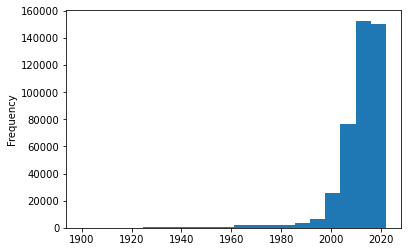

In [75]:
df['year'].plot(kind='hist',bins=20)

<AxesSubplot:>

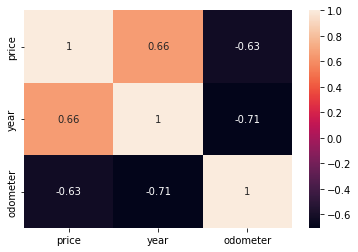

In [24]:

sns.heatmap(df1.corr(),annot=True)

In [25]:


# select non-numerical columns
categorical = list(df1.select_dtypes(include='object').columns)

# convert to category
df1[categorical] = df1[categorical].astype('category')

# encode categoricals
encoder = OrdinalEncoder()
df1[categorical] = encoder.fit_transform(df1[categorical])

In [26]:
df1

,price,year,manufacturer,fuel,odometer,title_status,transmission,type
27,33590,2014.0,13.0,2.0,57923.0,0.0,2.0,8.0
28,22590,2010.0,7.0,2.0,71229.0,0.0,2.0,8.0
29,39590,2020.0,7.0,2.0,19160.0,0.0,2.0,8.0
30,30990,2017.0,37.0,2.0,41124.0,0.0,2.0,8.0
31,15000,2013.0,12.0,2.0,128000.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...
426875,23590,2019.0,29.0,2.0,32226.0,0.0,2.0,9.0
426876,30590,2020.0,39.0,2.0,12029.0,0.0,2.0,9.0
426877,34990,2020.0,6.0,0.0,4174.0,0.0,2.0,4.0
426878,28990,2018.0,22.0,2.0,30112.0,0.0,2.0,9.0


<AxesSubplot:xlabel='transmission'>

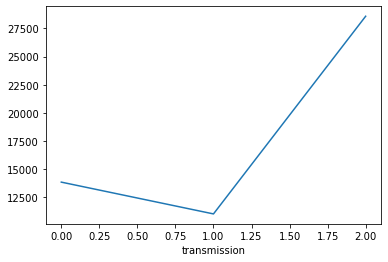

In [27]:
df1.groupby('transmission')['price'].median().plot()

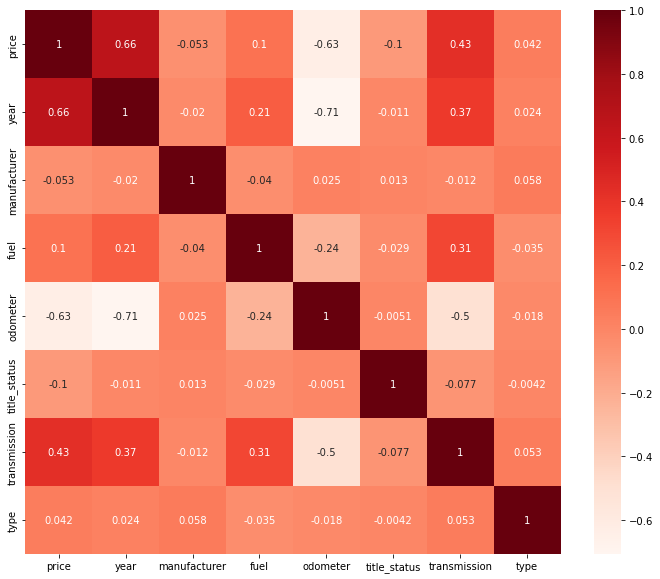

In [77]:

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
## splitting the data
X = df1.drop(['price'], axis = 1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
## fitting the model by using randomforestregressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
## scores
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(accuracy_train)
print(accuracy_test)


0.9861721939586547
0.9055521664566138


In [31]:
## predicting testing data with model
y_pred=model.predict(X_test)
y_pred

array([ 8215.03     ,  5715.41     ,  4357.13     , ..., 20806.1052381,
       12908.88     , 24577.78     ])

In [62]:
## comparing the both  model and existing output
s=model.predict(X)
output=pd.DataFrame(y)
output['model_predicted']=s
output=output.set_index('price')
output

,model_predicted
price,
33590,33590.000000
22590,22590.000000
39590,39590.000000
30990,30990.000000
15000,11965.100000
...,...
23590,23520.000000
30590,30590.000000
34990,34990.000000


In [63]:
## Converting output to Excel 
output.to_excel("output.xlsx",
             sheet_name='Sheet_name') 

In [64]:
## future predictions
model.predict([[2022,13,2,57964,0,2,8]])

array([30356.22])